## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [3]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

df = pd.read_csv("LoanStatus.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [12]:
# აპლიკანტების შემოსავლის მინიმალური,მაქსიმალური,საშუალო რაოდენობები, მედიანა და სტანდარტული გადახრა
print(df.ApplicantIncome.min() ,"-Min Income")
print(df.ApplicantIncome.max() ,"-Max Income")
print(df.ApplicantIncome.mean() ,"-Average Income")
print(df.ApplicantIncome.median() ,"-Median")
print(df.ApplicantIncome.std() ,"-Std. deviation")

150 -Min Income
81000 -Max Income
5403.459283387622 -Average Income
3812.5 -Median
6109.041673387178 -Std. deviation


In [7]:
# თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [14]:
# სესხის აღების ალბათობა

# სტატუსების სრული რაოდენობა
total = df["Loan_Status"].count()
#მხოლოდ დადებითი სესხის სტატუსის რაოდენობა
loan_status = df[df["Loan_Status"]=="Y"]["Loan_Status"].count()

# ალბათობის გამოთვლა
prob = loan_status/total
print("Probability of getting a loan is",prob)

Probability of getting a loan is 0.6872964169381107


In [16]:
# სესხის აღების ალბათობა, კარგი საკრედიტო ისტორიით
# სტატუსების სრული რაოდენობა
total = df["Loan_Status"].count()
# დადებითი სტატუსის და კარგი საკრედიტო ისტორიის მიხედვით გაფილტვრა
condition = (df["Loan_Status"] == "Y") & (df["Credit_History"] == 1.0)
loan_status = df[condition]["Loan_Status"].count()

prob = loan_status / total
print("Probability of getting a loan when Credit_History is 1.0 is", prob)

Probability of getting a loan when Credit_History is 1.0 is 0.6156351791530945


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

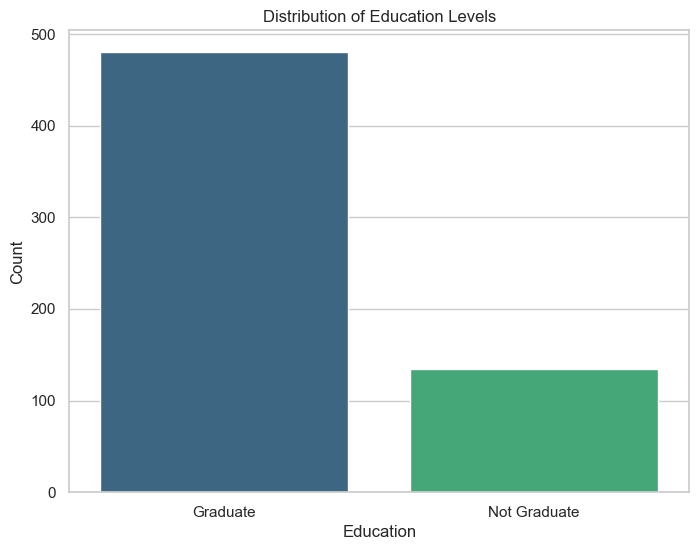

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='viridis')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

plt.show()

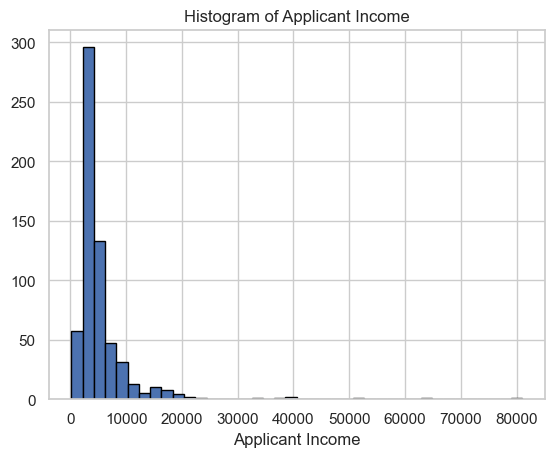

In [27]:
plt.hist(df['ApplicantIncome'], bins=40, edgecolor='black')
plt.xlabel('Applicant Income')
plt.title('Histogram of Applicant Income')

plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [ ]:
from scipy.stats import norm

In [28]:
mean_income = df["ApplicantIncome"].mean()
income_std_dev = df["ApplicantIncome"].std()
income_limit_value = 2000

cumulative_prob = norm.cdf(income_limit_value, mean_income, income_std_dev) * 100

print(cumulative_prob,"% is cumulative probability of clients with less than 2000 euro salary")

28.872328177095586 % is cumulative probability of clients with less than 2000 euro salary


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

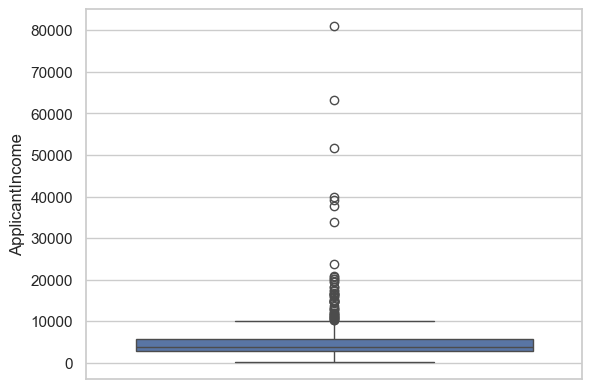

In [32]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

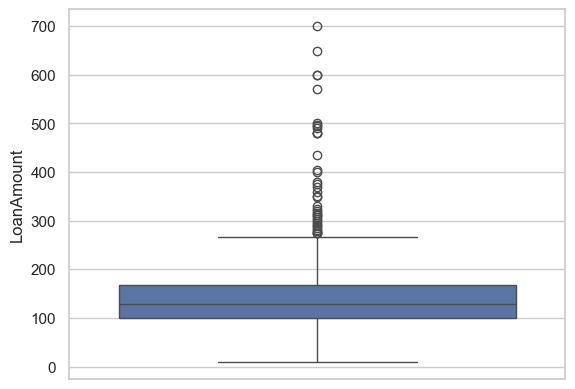

In [33]:
sns.boxplot(df['LoanAmount'])
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [37]:
from scipy.stats import ttest_1samp,ttest_ind


In [40]:
population_mean = 5000
t_statistic, p_value = stats.ttest_1samp(df['ApplicantIncome'], population_mean) 
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 1.6364804093914873
p-value: 0.10225234862970933


In [41]:
approved_applicants = df[df['Loan_Status'] == 'Y'][column_name]
rejected_applicants = df[df['Loan_Status'] == 'N'][column_name]
t_statistic, p_value = ttest_ind(approved_applicants, rejected_applicants, equal_var=False)
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -0.10944913176213944
p-value: 0.9129148547301199
